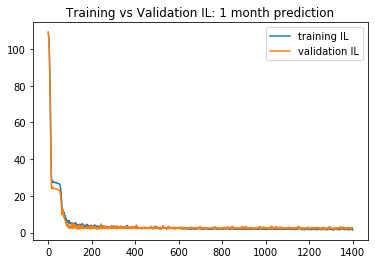

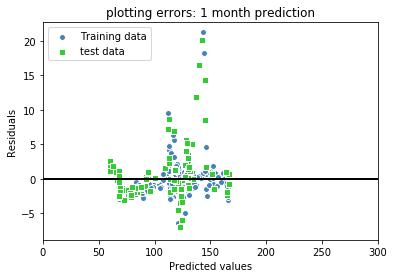

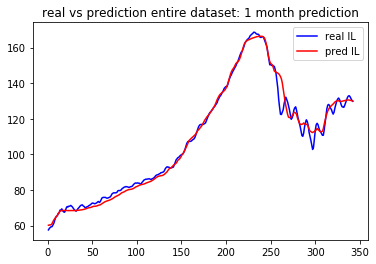

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt
import random
%matplotlib inline


random.seed(10)

'''
first import data and store it in dataframe
'''
basepath='C:\\Users\\marwe\\Desktop\\CDC_conf\\litterature\\'
df_house=pd.read_csv(basepath+'cities_csv.csv')

#print(df_house.isnull().sum())

f=["AZ-Phoenix","GA-Atlanta","MI-Detroit","MN-Minneapolis","TX-Dallas","WA-Seattle","Composite-20"]
for item in f:
    df_house=df_house.drop(item,axis=1)

#print(df_house.isnull().sum())

df_house['Date'] = pd.to_datetime(df_house['Date'])


"""

creating my dataset

"""

col_order=['index-6','index-5','index-4','index-3','index-2','index-1']#"index"]

df_LA=pd.DataFrame()
df_LA['Date']=df_house['Date']


df_LA['index']=df_house['CA-Los Angeles']
#print(df_LA.head())
df_LA['index-1']=df_house['CA-Los Angeles'].shift(1)
df_LA['index-2']=df_house['CA-Los Angeles'].shift(2)
df_LA['index-3']=df_house['CA-Los Angeles'].shift(3)
df_LA['index-4']=df_house['CA-Los Angeles'].shift(4)
df_LA['index-5']=df_house['CA-Los Angeles'].shift(5)
df_LA['index-6']=df_house['CA-Los Angeles'].shift(6)
df_LA=df_LA.dropna()
y_LA=df_LA['index']
df_LA=df_LA[col_order]

# up an down table for Dow
df_SD=pd.DataFrame()
df_SD['Date']=df_house['Date']
df_SD['index']=df_house['CA-San Diego']


#print(df_SD.head())
df_SD['index-1']=df_house['CA-San Diego'].shift(1)
df_SD['index-2']=df_house['CA-San Diego'].shift(2)
df_SD['index-3']=df_house['CA-San Diego'].shift(3)
df_SD['index-4']=df_house['CA-San Diego'].shift(4)
df_SD['index-5']=df_house['CA-San Diego'].shift(5)
df_SD['index-6']=df_house['CA-San Diego'].shift(6)
df_SD=df_SD.dropna()
y_SD=df_SD['index']
df_SD=df_SD[col_order]

# up an down table for nasdaq
df_SF=pd.DataFrame()
df_SF['Date']=df_house['Date']
df_SF['index']=df_house['CA-San Francisco']

#print(df_SF.head())
df_SF['index-1']=df_house['CA-San Francisco'].shift(1)
df_SF['index-2']=df_house['CA-San Francisco'].shift(2)
df_SF['index-3']=df_house['CA-San Francisco'].shift(3)
df_SF['index-4']=df_house['CA-San Francisco'].shift(4)
df_SF['index-5']=df_house['CA-San Francisco'].shift(5)
df_SF['index-6']=df_house['CA-San Francisco'].shift(6)
df_SF=df_SF.dropna()
y_SF=df_SF['index']
df_SF=df_SF[col_order]



df_D=pd.DataFrame()
df_D['Date']=df_house['Date']
df_D['index']=df_house['CO-Denver']

#print(df_D.head())
df_D['index-1']=df_house['CO-Denver'].shift(1)
df_D['index-2']=df_house['CO-Denver'].shift(2)
df_D['index-3']=df_house['CO-Denver'].shift(3)
df_D['index-4']=df_house['CO-Denver'].shift(4)
df_D['index-5']=df_house['CO-Denver'].shift(5)
df_D['index-6']=df_house['CO-Denver'].shift(6)
df_D=df_D.dropna()
y_D=df_D['index']
df_D=df_D[col_order]


df_DC=pd.DataFrame()
df_DC['Date']=df_house['Date']
df_DC['index']=df_house['DC-Washington']
y_DC=df_house['DC-Washington']
#print(df_DC.head())
df_DC['index-1']=df_house['DC-Washington'].shift(1)
df_DC['index-2']=df_house['DC-Washington'].shift(2)
df_DC['index-3']=df_house['DC-Washington'].shift(3)
df_DC['index-4']=df_house['DC-Washington'].shift(4)
df_DC['index-5']=df_house['DC-Washington'].shift(5)
df_DC['index-6']=df_house['DC-Washington'].shift(6)
df_DC=df_DC.dropna()
y_DC=df_DC['index']
df_DC=df_DC[col_order]


df_M=pd.DataFrame()
df_M['Date']=df_house['Date']
df_M['index']=df_house['FL-Miami']

#print(df_M.head())
df_M['index-1']=df_house['FL-Miami'].shift(1)
df_M['index-2']=df_house['FL-Miami'].shift(2)
df_M['index-3']=df_house['FL-Miami'].shift(3)
df_M['index-4']=df_house['FL-Miami'].shift(4)
df_M['index-5']=df_house['FL-Miami'].shift(5)
df_M['index-6']=df_house['FL-Miami'].shift(6)
df_M=df_M.dropna()
y_M=df_M['index']
df_M=df_M[col_order]


df_TP=pd.DataFrame()
df_TP['Date']=df_house['Date']
df_TP['index']=df_house['FL-Tampa']

#print(df_TP.head())
df_TP['index-1']=df_house['FL-Tampa'].shift(1)
df_TP['index-2']=df_house['FL-Tampa'].shift(2)
df_TP['index-3']=df_house['FL-Tampa'].shift(3)
df_TP['index-4']=df_house['FL-Tampa'].shift(4)
df_TP['index-5']=df_house['FL-Tampa'].shift(5)
df_TP['index-6']=df_house['FL-Tampa'].shift(6)
df_TP=df_TP.dropna()
y_TP=df_TP['index']
df_TP=df_TP[col_order]

df_IL=pd.DataFrame()
df_IL['Date']=df_house['Date']
df_IL['index']=df_house['IL-Chicago']

#print(df_IL.head())
df_IL['index-1']=df_house['IL-Chicago'].shift(1)
df_IL['index-2']=df_house['IL-Chicago'].shift(2)
df_IL['index-3']=df_house['IL-Chicago'].shift(3)
df_IL['index-4']=df_house['IL-Chicago'].shift(4)
df_IL['index-5']=df_house['IL-Chicago'].shift(5)
df_IL['index-6']=df_house['IL-Chicago'].shift(6)
df_IL=df_IL.dropna()
y_IL=df_IL['index']
df_IL=df_IL[col_order]

df_BS=pd.DataFrame()
df_BS['Date']=df_house['Date']
df_BS['index']=df_house['MA-Boston']

#print(df_BS.head())
df_BS['index-1']=df_house['MA-Boston'].shift(1)
df_BS['index-2']=df_house['MA-Boston'].shift(2)
df_BS['index-3']=df_house['MA-Boston'].shift(3)
df_BS['index-4']=df_house['MA-Boston'].shift(4)
df_BS['index-5']=df_house['MA-Boston'].shift(5)
df_BS['index-6']=df_house['MA-Boston'].shift(6)
df_BS=df_BS.dropna()
y_BS=df_BS['index']
df_BS=df_BS[col_order]


df_NC=pd.DataFrame()
df_NC['Date']=df_house['Date']
df_NC['index']=df_house['NC-Charlotte']

#print(df_NC.head())
df_NC['index-1']=df_house['NC-Charlotte'].shift(1)
df_NC['index-2']=df_house['NC-Charlotte'].shift(2)
df_NC['index-3']=df_house['NC-Charlotte'].shift(3)
df_NC['index-4']=df_house['NC-Charlotte'].shift(4)
df_NC['index-5']=df_house['NC-Charlotte'].shift(5)
df_NC['index-6']=df_house['NC-Charlotte'].shift(6)
df_NC=df_NC.dropna()
y_NC=df_NC['index']
df_NC=df_NC[col_order]


df_NV=pd.DataFrame()
df_NV['Date']=df_house['Date']
df_NV['index']=df_house['NV-Las Vegas']

#print(df_NV.head())
df_NV['index-1']=df_house['NV-Las Vegas'].shift(1)
df_NV['index-2']=df_house['NV-Las Vegas'].shift(2)
df_NV['index-3']=df_house['NV-Las Vegas'].shift(3)
df_NV['index-4']=df_house['NV-Las Vegas'].shift(4)
df_NV['index-5']=df_house['NV-Las Vegas'].shift(5)
df_NV['index-6']=df_house['NV-Las Vegas'].shift(6)
df_NV=df_NV.dropna()
y_NV=df_NV['index']
df_NV=df_NV[col_order]



df_NY=pd.DataFrame()
df_NY['Date']=df_house['Date']
df_NY['index']=df_house['NY-New York']

#print(df_NY.head())
df_NY['index-1']=df_house['NY-New York'].shift(1)
df_NY['index-2']=df_house['NY-New York'].shift(2)
df_NY['index-3']=df_house['NY-New York'].shift(3)
df_NY['index-4']=df_house['NY-New York'].shift(4)
df_NY['index-5']=df_house['NY-New York'].shift(5)
df_NY['index-6']=df_house['NY-New York'].shift(6)
df_NY=df_NY.dropna()
y_NY=df_NY['index']
df_NY=df_NY[col_order]



df_OH=pd.DataFrame()
df_OH['Date']=df_house['Date']
df_OH['index']=df_house['OH-Cleveland']

#print(df_OH.head())
df_OH['index-1']=df_house['OH-Cleveland'].shift(1)
df_OH['index-2']=df_house['OH-Cleveland'].shift(2)
df_OH['index-3']=df_house['OH-Cleveland'].shift(3)
df_OH['index-4']=df_house['OH-Cleveland'].shift(4)
df_OH['index-5']=df_house['OH-Cleveland'].shift(5)
df_OH['index-6']=df_house['OH-Cleveland'].shift(6)
df_OH=df_OH.dropna()
y_OH=df_OH['index']
df_OH=df_OH[col_order]


df_OR=pd.DataFrame()
df_OR['Date']=df_house['Date']
df_OR['index']=df_house['OR-Portland']

#print(df_OR.head())
df_OR['index-1']=df_house['OR-Portland'].shift(1)
df_OR['index-2']=df_house['OR-Portland'].shift(2)
df_OR['index-3']=df_house['OR-Portland'].shift(3)
df_OR['index-4']=df_house['OR-Portland'].shift(4)
df_OR['index-5']=df_house['OR-Portland'].shift(5)
df_OR['index-6']=df_house['OR-Portland'].shift(6)
df_OR=df_OR.dropna()
y_OR=df_OR['index']
df_OR=df_OR[col_order]

df_C10=pd.DataFrame()
df_C10['Date']=df_house['Date']
df_C10['index']=df_house['Composite-10']

#print(df_C10.head())
df_C10['index-1']=df_house['Composite-10'].shift(1)
df_C10['index-2']=df_house['Composite-10'].shift(2)
df_C10['index-3']=df_house['Composite-10'].shift(3)
df_C10['index-4']=df_house['Composite-10'].shift(4)
df_C10['index-5']=df_house['Composite-10'].shift(5)
df_C10['index-6']=df_house['Composite-10'].shift(6)
df_C10=df_C10.dropna()
y_C10=df_C10['index']
df_C10=df_C10[col_order]



df_USA=pd.DataFrame()
df_USA['Date']=df_house['Date']
df_USA['index']=df_house['National-US']

#print(df_USA.head())
df_USA['index-1']=df_house['National-US'].shift(1)
df_USA['index-2']=df_house['National-US'].shift(2)
df_USA['index-3']=df_house['National-US'].shift(3)
df_USA['index-4']=df_house['National-US'].shift(4)
df_USA['index-5']=df_house['National-US'].shift(5)
df_USA['index-6']=df_house['National-US'].shift(6)
df_USA=df_USA.dropna()
y_USA=df_USA['index']
df_USA=df_USA[col_order]



chosen_city=y_IL


total_frame = np.dstack((df_LA,df_SD,df_SF,df_D,df_DC,df_M,df_TP,df_IL,df_BS,df_NC,df_NV,df_NY,df_OH,df_OR,df_C10,df_USA))





from keras.preprocessing.text import Tokenizer
from keras import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras import layers
from keras import Input
from keras.models import Model
from keras import regularizers


X_train,X_test,y_LA_train,y_LA_test= train_test_split(total_frame,chosen_city,test_size=0.3,random_state=12)
#X_train,X_test,y_LA_train,y_LA_test= total_frame[:330,:,:],total_frame[330:,:,:],chosen_city[:330],chosen_city[330:]



input_hist=Input(shape=(6,16))
    
    
    
# the second branch opreates on the second input

    
# the 3rd branch opreates on the 3rd input
    
x = layers.LSTM(100,name='a',return_sequences=True)(input_hist)
x=layers.Dropout(0.15)(x)
x = layers.LSTM(50,name='b',return_sequences=True)(x)
#x=layers.Dropout(0.1)(x)
x=layers.Flatten()(x)
x=layers.Dense(100, activation="relu",name='c')(x)
x=layers.Dense(1, activation="linear",name='d')(x)
#x=Model(inputs=input_hist, outputs=x)
    

model = Model(inputs=input_hist, outputs=x)
#model.summary()
model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['mean_absolute_error'])
    
    
  
history_house=model.fit(X_train, y_LA_train, epochs=1400, batch_size=64, validation_split=0.2,verbose=0)  
                            



mse_train_LA = history_house.history['mean_absolute_error']
mse_val_LA = history_house.history['val_mean_absolute_error']

epochs = range(1, len(mse_train_LA) + 1)

plt.plot(epochs, mse_train_LA, label='training IL')
plt.plot(epochs, mse_val_LA , label='validation IL')
plt.title('Training vs Validation IL: 1 month prediction')
plt.legend()
#plt.figure()
plt.show()




"""
see how we did on test dataset
"""
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
plt.scatter(y_train_pred.reshape(len(y_train_pred)), y_train_pred.reshape(len(y_train_pred)) - y_LA_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred.reshape(len(y_test_pred)), y_test_pred.reshape(len(y_test_pred)) - y_LA_test,c='limegreen', marker='s', edgecolor='white',label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('plotting errors: 1 month prediction')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=300, color='black', lw=2)
plt.xlim([0, 300])
plt.show()




#y_try_pred=model.predict(total_frame)
#y_try_pred=model.predict(X_test)



y_all=model.predict(total_frame)
#t=range(330, 330+len(y_LA_test))
time = range(1, len(chosen_city) + 1)
plt.plot(time,chosen_city, color='blue',label='real IL')
plt.plot(time,y_all, color='red', label='pred IL')
plt.title('real vs prediction entire dataset: 1 month prediction')
plt.legend()
#plt.figure()
plt.show()

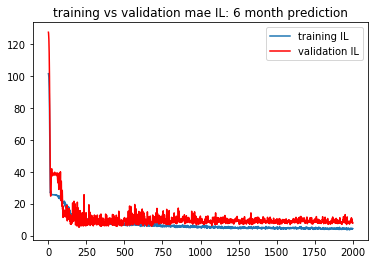

No handles with labels found to put in legend.


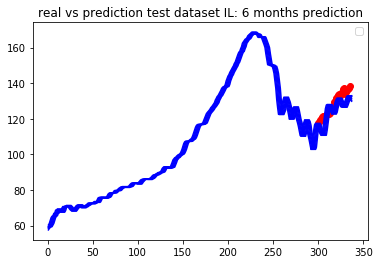

No handles with labels found to put in legend.


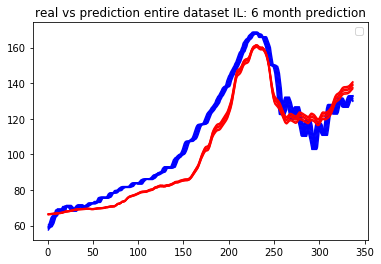

In [3]:
"""
try something new: what if we predict few months ahead: Multi-step LSTM
"""







col_order_x=['index-6','index-5','index-4','index-3','index-2','index-1']#"index"]
col_order_y=['index','index+1','index+2','index+3','index+4','index+5']#"index"]

df_LA=pd.DataFrame()
df_LA['Date']=df_house['Date']


df_LA['index']=df_house['CA-Los Angeles']
df_LA['index+1']=df_house['CA-Los Angeles'].shift(-1)
df_LA['index+2']=df_house['CA-Los Angeles'].shift(-2)
df_LA['index+3']=df_house['CA-Los Angeles'].shift(-3)
df_LA['index+4']=df_house['CA-Los Angeles'].shift(-4)
df_LA['index+5']=df_house['CA-Los Angeles'].shift(-5)

#print(df_LA.head())
df_LA['index-1']=df_house['CA-Los Angeles'].shift(1)
df_LA['index-2']=df_house['CA-Los Angeles'].shift(2)
df_LA['index-3']=df_house['CA-Los Angeles'].shift(3)
df_LA['index-4']=df_house['CA-Los Angeles'].shift(4)
df_LA['index-5']=df_house['CA-Los Angeles'].shift(5)
df_LA['index-6']=df_house['CA-Los Angeles'].shift(6)
df_LA=df_LA.dropna()
y_LA=df_LA[col_order_y]
df_LA=df_LA[col_order]

# up an down table for Dow
df_SD=pd.DataFrame()
df_SD['Date']=df_house['Date']


df_SD['index']=df_house['CA-San Diego']
df_SD['index+1']=df_house['CA-San Diego'].shift(-1)
df_SD['index+2']=df_house['CA-San Diego'].shift(-2)
df_SD['index+3']=df_house['CA-San Diego'].shift(-3)
df_SD['index+4']=df_house['CA-San Diego'].shift(-4)
df_SD['index+5']=df_house['CA-San Diego'].shift(-5)
#df_SD['index-6']=df_house['CA-San Diego'].shift(6)


#print(df_SD.head())
df_SD['index-1']=df_house['CA-San Diego'].shift(1)
df_SD['index-2']=df_house['CA-San Diego'].shift(2)
df_SD['index-3']=df_house['CA-San Diego'].shift(3)
df_SD['index-4']=df_house['CA-San Diego'].shift(4)
df_SD['index-5']=df_house['CA-San Diego'].shift(5)
df_SD['index-6']=df_house['CA-San Diego'].shift(6)
df_SD=df_SD.dropna()
y_SD=df_SD[col_order_y]
df_SD=df_SD[col_order]

# up an down table for nasdaq
df_SF=pd.DataFrame()
df_SF['Date']=df_house['Date']


df_SF['index']=df_house['CA-San Francisco']
df_SF['index+1']=df_house['CA-San Francisco'].shift(-1)
df_SF['index+2']=df_house['CA-San Francisco'].shift(-2)
df_SF['index+3']=df_house['CA-San Francisco'].shift(-3)
df_SF['index+4']=df_house['CA-San Francisco'].shift(-4)
df_SF['index+5']=df_house['CA-San Francisco'].shift(-5)

#print(df_SF.head())
df_SF['index-1']=df_house['CA-San Francisco'].shift(1)
df_SF['index-2']=df_house['CA-San Francisco'].shift(2)
df_SF['index-3']=df_house['CA-San Francisco'].shift(3)
df_SF['index-4']=df_house['CA-San Francisco'].shift(4)
df_SF['index-5']=df_house['CA-San Francisco'].shift(5)
df_SF['index-6']=df_house['CA-San Francisco'].shift(6)
df_SF=df_SF.dropna()
y_SF=df_SF[col_order_y]
df_SF=df_SF[col_order]



df_D=pd.DataFrame()
df_D['Date']=df_house['Date']
df_D['index']=df_house['CO-Denver']
df_D['index+1']=df_house['CO-Denver'].shift(-1)
df_D['index+2']=df_house['CO-Denver'].shift(-2)
df_D['index+3']=df_house['CO-Denver'].shift(-3)
df_D['index+4']=df_house['CO-Denver'].shift(-4)
df_D['index+5']=df_house['CO-Denver'].shift(-5)

#print(df_D.head())
df_D['index-1']=df_house['CO-Denver'].shift(1)
df_D['index-2']=df_house['CO-Denver'].shift(2)
df_D['index-3']=df_house['CO-Denver'].shift(3)
df_D['index-4']=df_house['CO-Denver'].shift(4)
df_D['index-5']=df_house['CO-Denver'].shift(5)
df_D['index-6']=df_house['CO-Denver'].shift(6)
df_D=df_D.dropna()
y_D=df_D[col_order_y]
df_D=df_D[col_order]


df_DC=pd.DataFrame()
df_DC['Date']=df_house['Date']
df_DC['index']=df_house['DC-Washington']
df_DC['index+1']=df_house['DC-Washington'].shift(-1)
df_DC['index+2']=df_house['DC-Washington'].shift(-2)
df_DC['index+3']=df_house['DC-Washington'].shift(-3)
df_DC['index+4']=df_house['DC-Washington'].shift(-4)
df_DC['index+5']=df_house['DC-Washington'].shift(-5)
#print(df_DC.head())
df_DC['index-1']=df_house['DC-Washington'].shift(1)
df_DC['index-2']=df_house['DC-Washington'].shift(2)
df_DC['index-3']=df_house['DC-Washington'].shift(3)
df_DC['index-4']=df_house['DC-Washington'].shift(4)
df_DC['index-5']=df_house['DC-Washington'].shift(5)
df_DC['index-6']=df_house['DC-Washington'].shift(6)
df_DC=df_DC.dropna()
y_DC=df_DC[col_order_y]
df_DC=df_DC[col_order]


df_M=pd.DataFrame()
df_M['Date']=df_house['Date']
df_M['index']=df_house['FL-Miami']
df_M['index+1']=df_house['FL-Miami'].shift(-1)
df_M['index+2']=df_house['FL-Miami'].shift(-2)
df_M['index+3']=df_house['FL-Miami'].shift(-3)
df_M['index+4']=df_house['FL-Miami'].shift(-4)
df_M['index+5']=df_house['FL-Miami'].shift(-5)

#print(df_M.head())
df_M['index-1']=df_house['FL-Miami'].shift(1)
df_M['index-2']=df_house['FL-Miami'].shift(2)
df_M['index-3']=df_house['FL-Miami'].shift(3)
df_M['index-4']=df_house['FL-Miami'].shift(4)
df_M['index-5']=df_house['FL-Miami'].shift(5)
df_M['index-6']=df_house['FL-Miami'].shift(6)
df_M=df_M.dropna()
y_M=df_M[col_order_y]
df_M=df_M[col_order]


df_TP=pd.DataFrame()
df_TP['Date']=df_house['Date']
df_TP['index']=df_house['FL-Tampa']
df_TP['index+1']=df_house['FL-Tampa'].shift(-1)
df_TP['index+2']=df_house['FL-Tampa'].shift(-2)
df_TP['index+3']=df_house['FL-Tampa'].shift(-3)
df_TP['index+4']=df_house['FL-Tampa'].shift(-4)
df_TP['index+5']=df_house['FL-Tampa'].shift(-5)

#print(df_TP.head())
df_TP['index-1']=df_house['FL-Tampa'].shift(1)
df_TP['index-2']=df_house['FL-Tampa'].shift(2)
df_TP['index-3']=df_house['FL-Tampa'].shift(3)
df_TP['index-4']=df_house['FL-Tampa'].shift(4)
df_TP['index-5']=df_house['FL-Tampa'].shift(5)
df_TP['index-6']=df_house['FL-Tampa'].shift(6)
df_TP=df_TP.dropna()
y_TP=df_TP[col_order_y]
df_TP=df_TP[col_order]

df_IL=pd.DataFrame()
df_IL['Date']=df_house['Date']
df_IL['index']=df_house['IL-Chicago']
df_IL['index+1']=df_house['IL-Chicago'].shift(-1)
df_IL['index+2']=df_house['IL-Chicago'].shift(-2)
df_IL['index+3']=df_house['IL-Chicago'].shift(-3)
df_IL['index+4']=df_house['IL-Chicago'].shift(-4)
df_IL['index+5']=df_house['IL-Chicago'].shift(-5)



#print(df_IL.head())
df_IL['index-1']=df_house['IL-Chicago'].shift(1)
df_IL['index-2']=df_house['IL-Chicago'].shift(2)
df_IL['index-3']=df_house['IL-Chicago'].shift(3)
df_IL['index-4']=df_house['IL-Chicago'].shift(4)
df_IL['index-5']=df_house['IL-Chicago'].shift(5)
df_IL['index-6']=df_house['IL-Chicago'].shift(6)
df_IL=df_IL.dropna()
y_IL=df_IL[col_order_y]
df_IL=df_IL[col_order]

df_BS=pd.DataFrame()
df_BS['Date']=df_house['Date']
df_BS['index']=df_house['MA-Boston']
df_BS['index+1']=df_house['MA-Boston'].shift(-1)
df_BS['index+2']=df_house['MA-Boston'].shift(-2)
df_BS['index+3']=df_house['MA-Boston'].shift(-3)
df_BS['index+4']=df_house['MA-Boston'].shift(-4)
df_BS['index+5']=df_house['MA-Boston'].shift(-5)



#print(df_BS.head())
df_BS['index-1']=df_house['MA-Boston'].shift(1)
df_BS['index-2']=df_house['MA-Boston'].shift(2)
df_BS['index-3']=df_house['MA-Boston'].shift(3)
df_BS['index-4']=df_house['MA-Boston'].shift(4)
df_BS['index-5']=df_house['MA-Boston'].shift(5)
df_BS['index-6']=df_house['MA-Boston'].shift(6)
df_BS=df_BS.dropna()
y_BS=df_BS[col_order_y]
df_BS=df_BS[col_order]


df_NC=pd.DataFrame()
df_NC['Date']=df_house['Date']
df_NC['index']=df_house['NC-Charlotte']
df_NC['index+1']=df_house['NC-Charlotte'].shift(-1)
df_NC['index+2']=df_house['NC-Charlotte'].shift(-2)
df_NC['index+3']=df_house['NC-Charlotte'].shift(-3)
df_NC['index+4']=df_house['NC-Charlotte'].shift(-4)
df_NC['index+5']=df_house['NC-Charlotte'].shift(-5)


#print(df_NC.head())
df_NC['index-1']=df_house['NC-Charlotte'].shift(1)
df_NC['index-2']=df_house['NC-Charlotte'].shift(2)
df_NC['index-3']=df_house['NC-Charlotte'].shift(3)
df_NC['index-4']=df_house['NC-Charlotte'].shift(4)
df_NC['index-5']=df_house['NC-Charlotte'].shift(5)
df_NC['index-6']=df_house['NC-Charlotte'].shift(6)
df_NC=df_NC.dropna()
y_NC=df_NC[col_order_y]
df_NC=df_NC[col_order]


df_NV=pd.DataFrame()
df_NV['Date']=df_house['Date']
df_NV['index']=df_house['NV-Las Vegas']
df_NV['index+1']=df_house['NV-Las Vegas'].shift(-1)
df_NV['index+2']=df_house['NV-Las Vegas'].shift(-2)
df_NV['index+3']=df_house['NV-Las Vegas'].shift(-3)
df_NV['index+4']=df_house['NV-Las Vegas'].shift(-4)
df_NV['index+5']=df_house['NV-Las Vegas'].shift(-5)


#print(df_NV.head())
df_NV['index-1']=df_house['NV-Las Vegas'].shift(1)
df_NV['index-2']=df_house['NV-Las Vegas'].shift(2)
df_NV['index-3']=df_house['NV-Las Vegas'].shift(3)
df_NV['index-4']=df_house['NV-Las Vegas'].shift(4)
df_NV['index-5']=df_house['NV-Las Vegas'].shift(5)
df_NV['index-6']=df_house['NV-Las Vegas'].shift(6)
df_NV=df_NV.dropna()
y_NV=df_NV[col_order_y]
df_NV=df_NV[col_order]



df_NY=pd.DataFrame()
df_NY['Date']=df_house['Date']
df_NY['index']=df_house['NY-New York']
df_NY['index+1']=df_house['NY-New York'].shift(-1)
df_NY['index+2']=df_house['NY-New York'].shift(-2)
df_NY['index+3']=df_house['NY-New York'].shift(-3)
df_NY['index+4']=df_house['NY-New York'].shift(-4)
df_NY['index+5']=df_house['NY-New York'].shift(-5)


#print(df_NY.head())
df_NY['index-1']=df_house['NY-New York'].shift(1)
df_NY['index-2']=df_house['NY-New York'].shift(2)
df_NY['index-3']=df_house['NY-New York'].shift(3)
df_NY['index-4']=df_house['NY-New York'].shift(4)
df_NY['index-5']=df_house['NY-New York'].shift(5)
df_NY['index-6']=df_house['NY-New York'].shift(6)
df_NY=df_NY.dropna()
y_NY=df_NY[col_order_y]
df_NY=df_NY[col_order]



df_OH=pd.DataFrame()
df_OH['Date']=df_house['Date']
df_OH['index']=df_house['OH-Cleveland']
df_OH['index+1']=df_house['OH-Cleveland'].shift(-1)
df_OH['index+2']=df_house['OH-Cleveland'].shift(-2)
df_OH['index+3']=df_house['OH-Cleveland'].shift(-3)
df_OH['index+4']=df_house['OH-Cleveland'].shift(-4)
df_OH['index+5']=df_house['OH-Cleveland'].shift(-5)

#print(df_OH.head())
df_OH['index-1']=df_house['OH-Cleveland'].shift(1)
df_OH['index-2']=df_house['OH-Cleveland'].shift(2)
df_OH['index-3']=df_house['OH-Cleveland'].shift(3)
df_OH['index-4']=df_house['OH-Cleveland'].shift(4)
df_OH['index-5']=df_house['OH-Cleveland'].shift(5)
df_OH['index-6']=df_house['OH-Cleveland'].shift(6)
df_OH=df_OH.dropna()
y_OH=df_OH[col_order_y]
df_OH=df_OH[col_order]


df_OR=pd.DataFrame()
df_OR['Date']=df_house['Date']
df_OR['index']=df_house['OR-Portland']
df_OR['index+1']=df_house['OR-Portland'].shift(-1)
df_OR['index+2']=df_house['OR-Portland'].shift(-2)
df_OR['index+3']=df_house['OR-Portland'].shift(-3)
df_OR['index+4']=df_house['OR-Portland'].shift(-4)
df_OR['index+5']=df_house['OR-Portland'].shift(-5)

#print(df_OR.head())
df_OR['index-1']=df_house['OR-Portland'].shift(1)
df_OR['index-2']=df_house['OR-Portland'].shift(2)
df_OR['index-3']=df_house['OR-Portland'].shift(3)
df_OR['index-4']=df_house['OR-Portland'].shift(4)
df_OR['index-5']=df_house['OR-Portland'].shift(5)
df_OR['index-6']=df_house['OR-Portland'].shift(6)
df_OR=df_OR.dropna()
y_OR=df_OR[col_order_y]
df_OR=df_OR[col_order]

df_C10=pd.DataFrame()
df_C10['Date']=df_house['Date']
df_C10['index']=df_house['Composite-10']
df_C10['index+1']=df_house['Composite-10'].shift(-1)
df_C10['index+2']=df_house['Composite-10'].shift(-2)
df_C10['index+3']=df_house['Composite-10'].shift(-3)
df_C10['index+4']=df_house['Composite-10'].shift(-4)
df_C10['index+5']=df_house['Composite-10'].shift(-5)

#print(df_C10.head())
df_C10['index-1']=df_house['Composite-10'].shift(1)
df_C10['index-2']=df_house['Composite-10'].shift(2)
df_C10['index-3']=df_house['Composite-10'].shift(3)
df_C10['index-4']=df_house['Composite-10'].shift(4)
df_C10['index-5']=df_house['Composite-10'].shift(5)
df_C10['index-6']=df_house['Composite-10'].shift(6)
df_C10=df_C10.dropna()
y_C10=df_C10[col_order_y]
df_C10=df_C10[col_order]



df_USA=pd.DataFrame()
df_USA['Date']=df_house['Date']
df_USA['index']=df_house['National-US']
df_USA['index+1']=df_house['National-US'].shift(-1)
df_USA['index+2']=df_house['National-US'].shift(-2)
df_USA['index+3']=df_house['National-US'].shift(-3)
df_USA['index+4']=df_house['National-US'].shift(-4)
df_USA['index+5']=df_house['National-US'].shift(-5)

#print(df_USA.head())
df_USA['index-1']=df_house['National-US'].shift(1)
df_USA['index-2']=df_house['National-US'].shift(2)
df_USA['index-3']=df_house['National-US'].shift(3)
df_USA['index-4']=df_house['National-US'].shift(4)
df_USA['index-5']=df_house['National-US'].shift(5)
df_USA['index-6']=df_house['National-US'].shift(6)
df_USA=df_USA.dropna()
y_USA=df_USA[col_order_y]
df_USA=df_USA[col_order]



chosen_city=y_IL


total_frame = np.dstack((df_LA,df_SD,df_SF,df_D,df_DC,df_M,df_TP,df_IL,df_BS,df_NC,df_NV,df_NY,df_OH,df_OR,df_C10,df_USA))





from keras.preprocessing.text import Tokenizer
from keras import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras import layers
from keras import Input
from keras.models import Model
from keras import regularizers


#X_train,X_test,y_LA_train,y_LA_test= train_test_split(total_frame,chosen_city,test_size=0.3,random_state=12)

X_train,X_test,y_LA_train,y_LA_test=total_frame[:300,:,:],total_frame[300:,:,:],chosen_city[:300],chosen_city[300:]

#X_train=total_frame[:331,:,:]

input_hist=Input(shape=(6,16))
    
    
    
# the second branch opreates on the second input

    
# the 3rd branch opreates on the 3rd input
    
x = layers.LSTM(100,name='a',recurrent_dropout=0.2,dropout=0.2,return_sequences=True)(input_hist)
#x=layers.Dropout(0.25)(x)
x = (layers.LSTM(50,recurrent_dropout=0.2,dropout=0.2,name='b',return_sequences=True))(x)
#x=layers.Dropout(0.25)(x)
x=layers.Flatten()(x)
x=layers.Dense(100, activation="relu",name='c')(x)
x=layers.Dense(6, activation="linear",name='d')(x)
#x=Model(inputs=input_hist, outputs=x)
    

model = Model(inputs=input_hist, outputs=x)
#model.summary()
model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['mean_absolute_error'])
    
    
  
history_house=model.fit(X_train, y_LA_train, epochs=2000, batch_size=64, validation_split=0.2,verbose=0)  
                            



mse_train_LA = history_house.history['mean_absolute_error']
mse_val_LA = history_house.history['val_mean_absolute_error']

epochs = range(1, len(mse_train_LA) + 1)

plt.plot(epochs, mse_train_LA, label='training IL')
plt.plot(epochs, mse_val_LA , color='red',label='validation IL')
plt.title('training vs validation mae IL: 6 month prediction')
plt.legend()
#plt.figure()
plt.show()




"""
see how we did on test dataset
"""

#y_try_pred=model.predict(total_frame)
y_try_pred_1=model.predict(np.reshape(total_frame[300,:,:],(1,6,16)))
y_try_pred_2=model.predict(np.reshape(total_frame[306,:,:],(1,6,16)))
y_try_pred_3=model.predict(np.reshape(total_frame[312,:,:],(1,6,16)))
y_try_pred_4=model.predict(np.reshape(total_frame[318,:,:],(1,6,16)))
y_try_pred_5=model.predict(np.reshape(total_frame[324,:,:],(1,6,16)))
y_try_pred_6=model.predict(np.reshape(total_frame[330,:,:],(1,6,16)))
#time_test = range(6)
time = range(1, len(chosen_city) + 1)
plt.plot(time,chosen_city, color='blue')
plt.scatter([300,301,302,303,304,305],y_try_pred_1[0], color='red')
plt.scatter([306,307,308,309,310,311],y_try_pred_2[0], color='red')
plt.scatter([312,313,314,315,316,317],y_try_pred_3[0], color='red')
plt.scatter([318,319,320,321,322,323],y_try_pred_4[0], color='red')
plt.scatter([324,325,326,327,328,329],y_try_pred_5[0], color='red')
plt.scatter([330,331,332,333,334,335],y_try_pred_6[0], color='red')
plt.title('real vs prediction test dataset IL: 6 months prediction')
plt.legend()
#plt.figure()
plt.show()




y_try_pred=model.predict(total_frame)
#y_try_pred=model.predict(X_test)
time = range(1, len(y_try_pred) + 1)
plt.plot(time,chosen_city, color='blue')
plt.plot(time,y_try_pred, color='red')
plt.title('real vs prediction entire dataset IL: 6 month prediction')
plt.legend()
#plt.figure()
plt.show()

